# Benchmarking Results

In [30]:
import matplotlib.pyplot as plt
from capo.analysis.utils import (
    get_results,
    # aggregate_results,
    # get_prompt_scores,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    # plot_population_scores,
    plot_population_members,
    plot_population_scores_comparison,
    plot_length_score,
    plot_performance_profile_curve,
)

In [31]:
OPTIMS = ["CAPO", "OPRO", "EvoPromptGA", "PromptWizard", "Initial"]
OPTIMS_NO_WIZ = ["CAPO", "EvoPromptGA", "OPRO", "Initial"]
OPTIMS_NO_SING = ["CAPO", "EvoPromptGA", "OPRO"]
DATASETS = ["sst-5", "agnews", "copa", "gsm8k", "subj"]
MODELS = ["llama", "qwen", "mistral"]

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We always use mean for aggregation since this better depicts the overall optimization process.

# Performance Profile

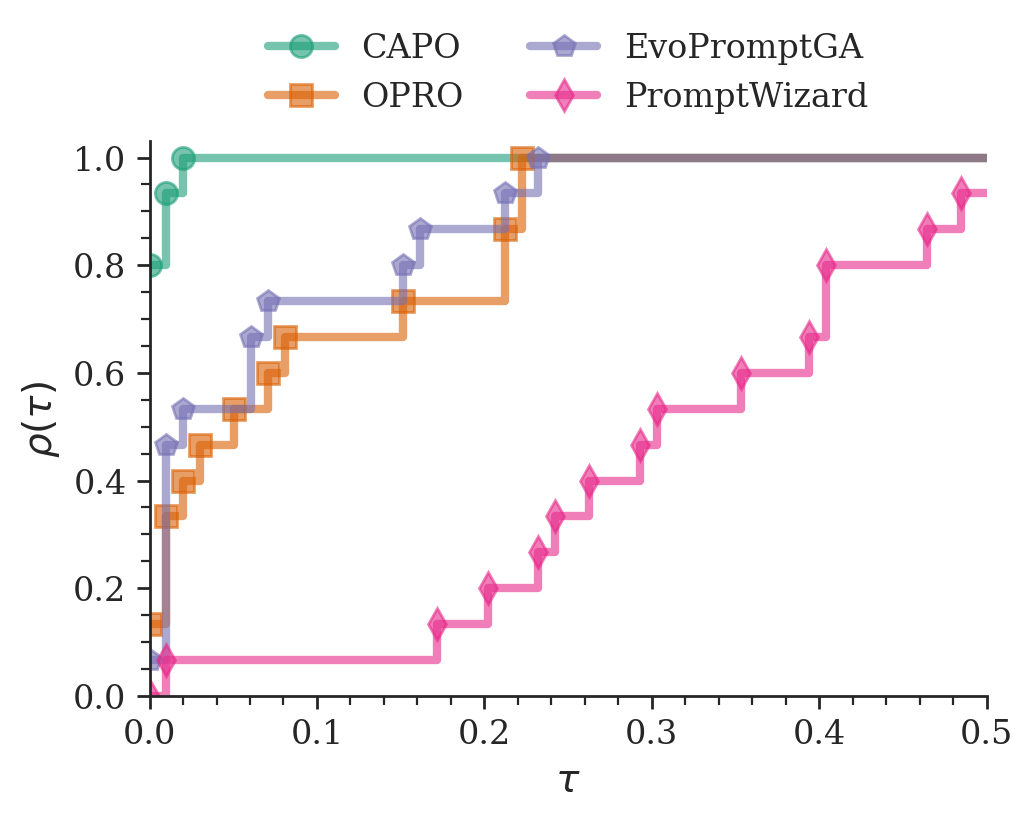

In [33]:
fig = plot_performance_profile_curve(path_prefix="../..")
fig.savefig(f"../../results/plots/performance_profile_curve.png", bbox_inches="tight")

# Benchmark Results

## Mistral

In [68]:
generate_comparison_table(model="mistral", path_prefix="../..")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69Â±2.94,72.21Â±7.45,61.65Â±6.04,33.71Â±5.89,94.56Â±0.94,62.17
OPRO,53.20Â±2.83,84.20Â±0.16,77.07Â±0.09,43.53Â±0.47,96.33Â±0.34,70.87
PromptWizard,31.07Â±3.80,44.40Â±25.76,59.00Â±5.09,48.67Â±6.46,57.47Â±10.28,48.12
EvoPromptGA,54.93Â±0.94,84.40Â±0.28,74.93Â±2.04,43.93Â±3.85,96.13Â±0.34,70.87
CAPO,60.20Â±0.33,84.33Â±2.13,81.67Â±1.64,65.07Â±1.20,95.13Â±1.20,77.28


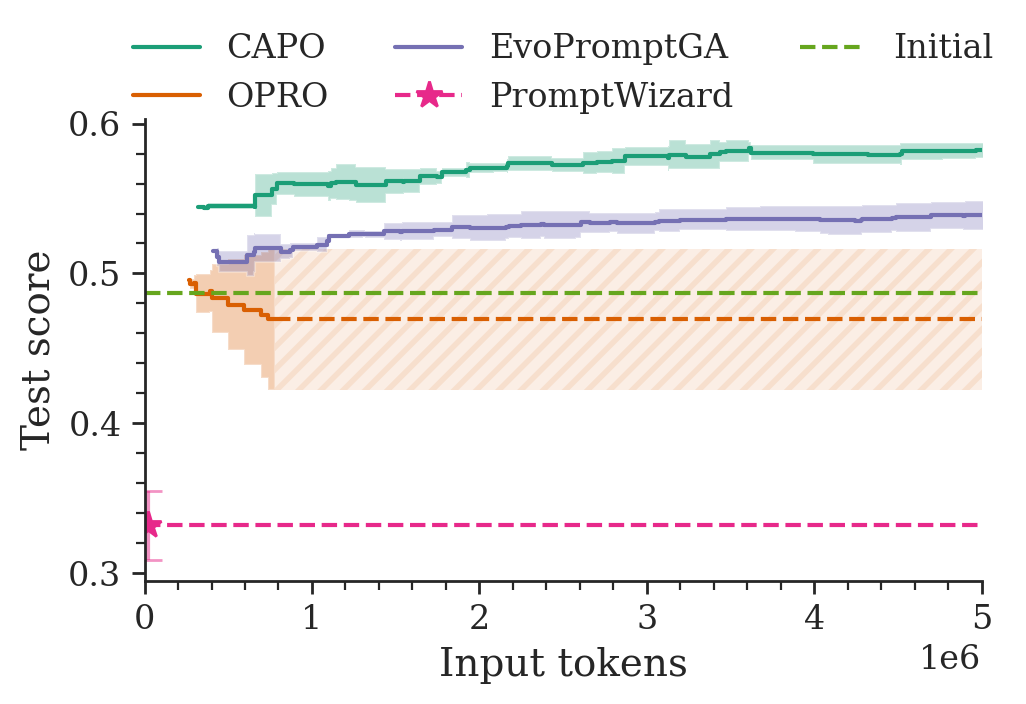

In [35]:
plot_population_scores_comparison(
    "sst-5",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
    figsize=(5.4, 3),
);

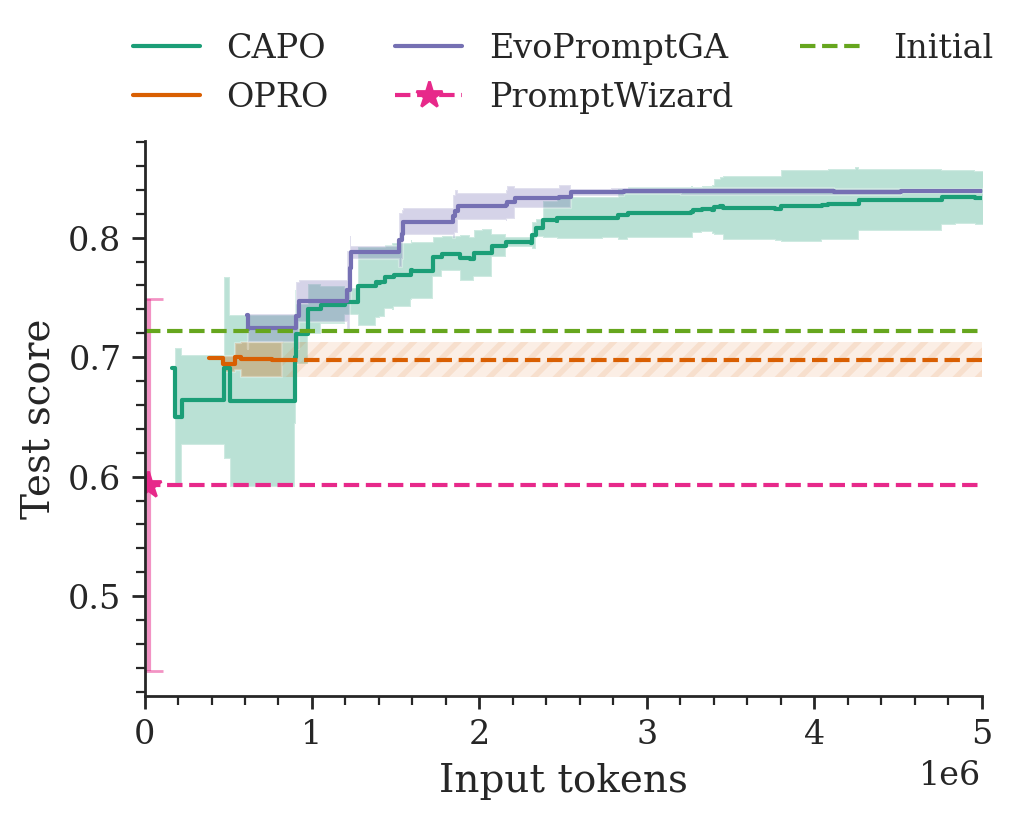

In [36]:
plot_population_scores_comparison(
    "agnews",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

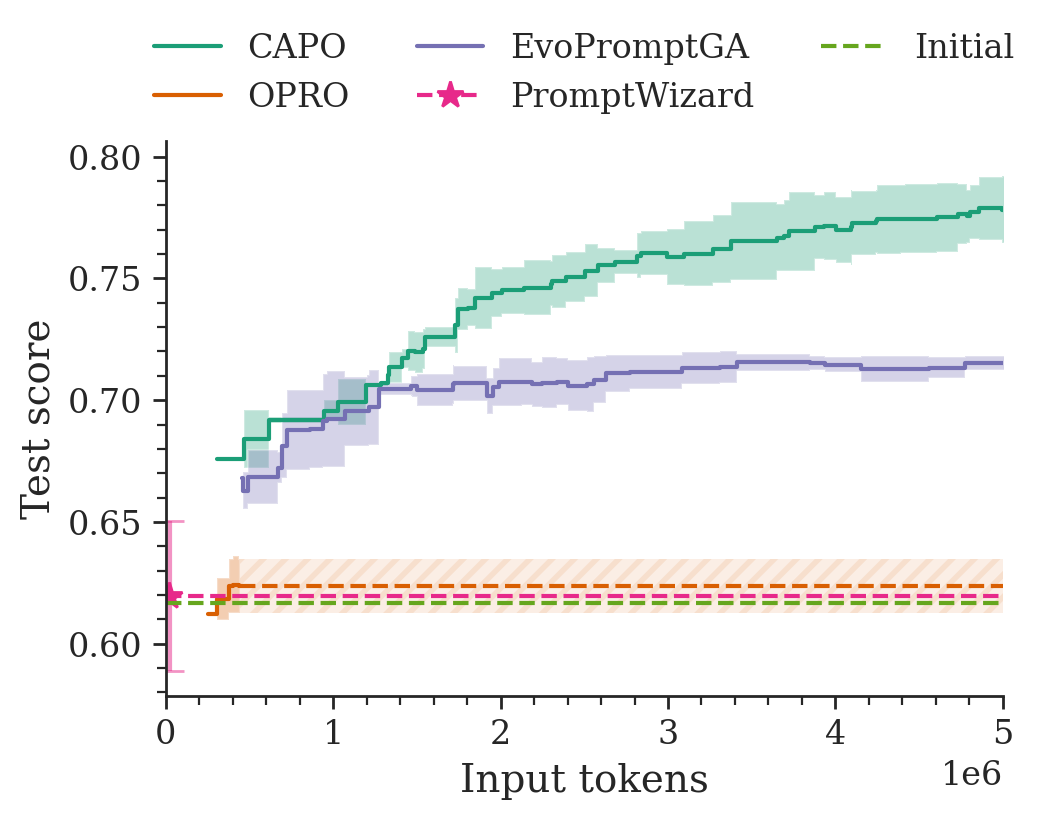

In [37]:
plot_population_scores_comparison(
    "subj",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

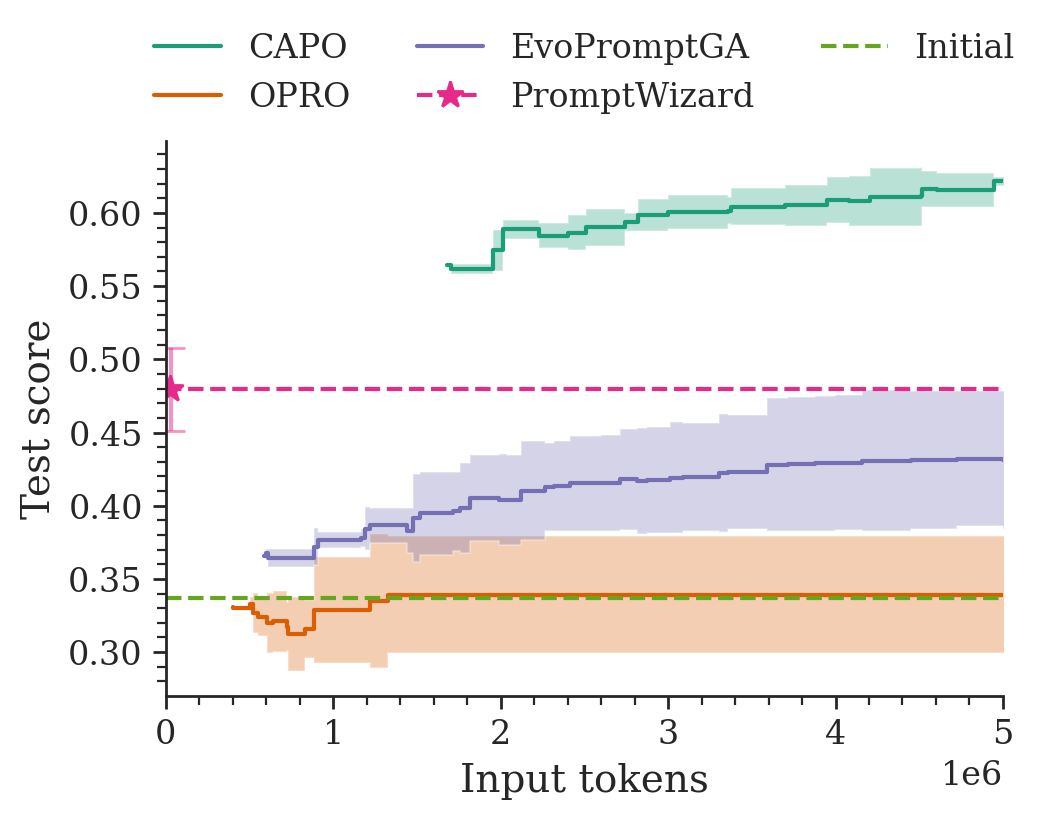

In [38]:
plot_population_scores_comparison(
    "gsm8k",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

--> use in main paper next to table

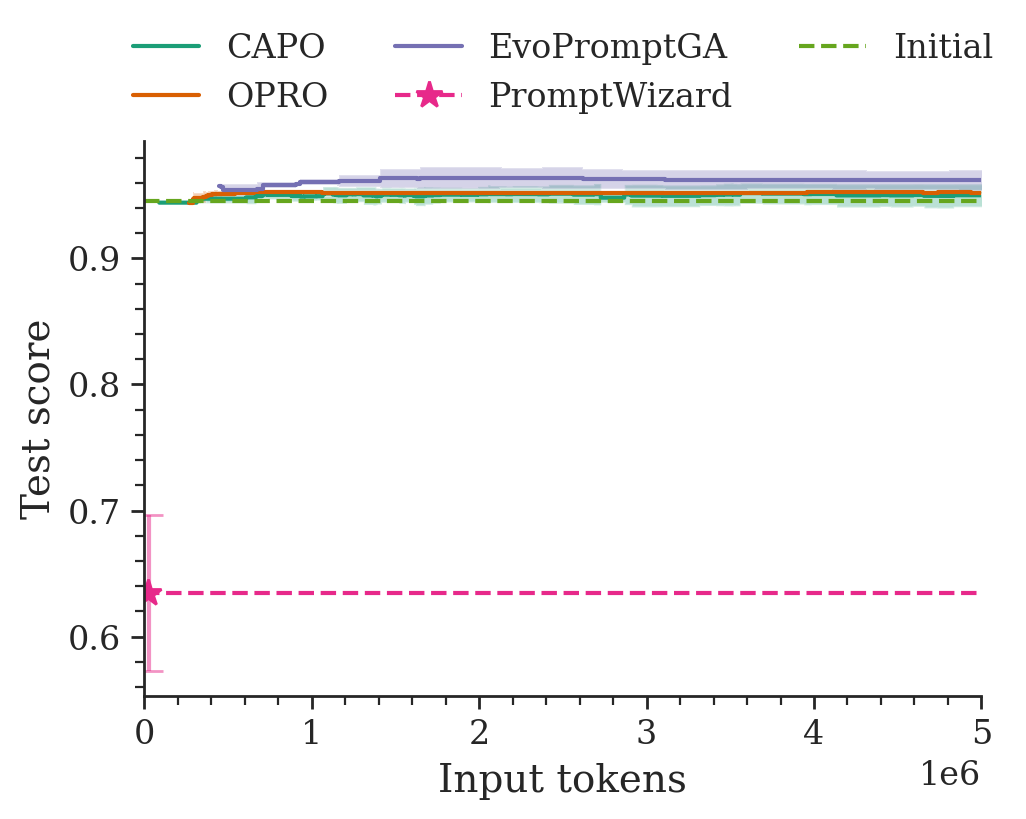

In [39]:
plot_population_scores_comparison(
    "copa",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

## Qwen

In [40]:
generate_comparison_table(model="qwen", path_prefix="../../")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68Â±1.94,79.57Â±0.84,62.85Â±4.53,33.08Â±7.78,98.27Â±0.43,66.09
OPRO,57.00Â±0.43,79.87Â±0.19,70.67Â±2.36,46.33Â±3.07,98.67Â±0.34,70.51
PromptWizard,39.73Â±12.31,63.47Â±28.49,64.93Â±5.01,15.27Â±20.19,98.13Â±0.19,56.31
EvoPromptGA,58.60Â±1.73,81.73Â±1.68,75.87Â±3.58,61.27Â±8.39,97.87Â±0.66,75.07
CAPO,59.07Â±0.50,87.07Â±0.81,91.00Â±0.65,60.20Â±4.82,98.47Â±0.19,79.16


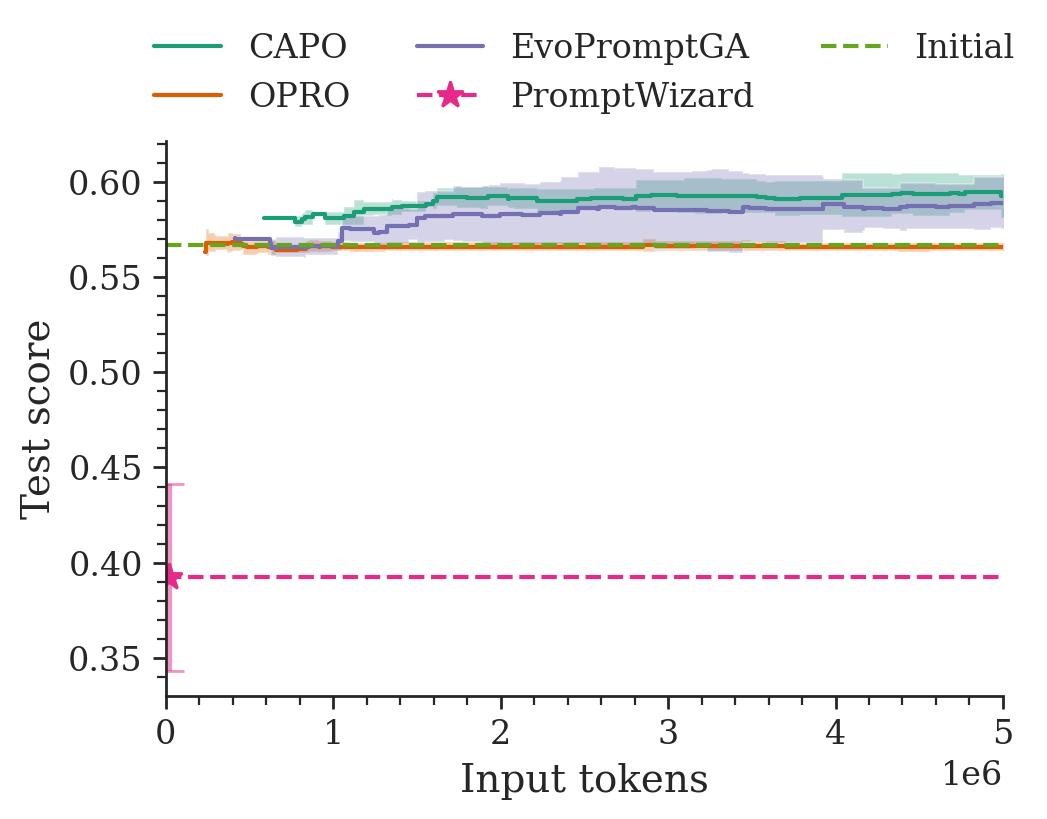

In [41]:
plot_population_scores_comparison(
    "sst-5",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

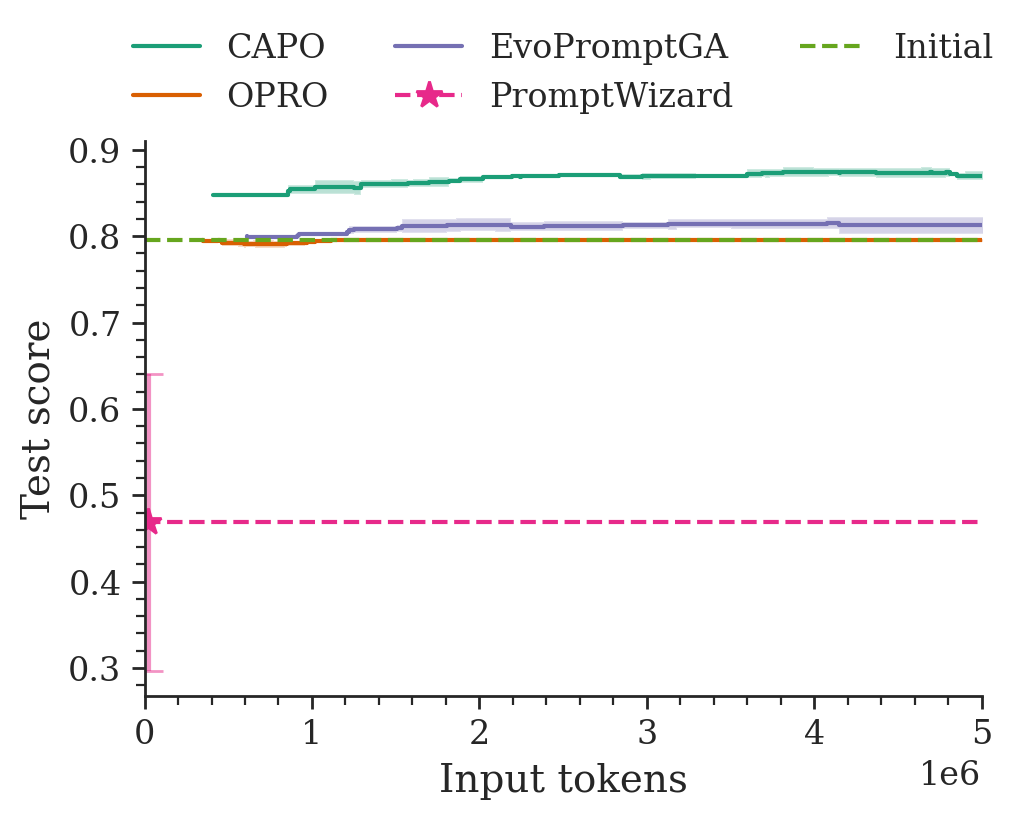

In [42]:
plot_population_scores_comparison(
    "agnews",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

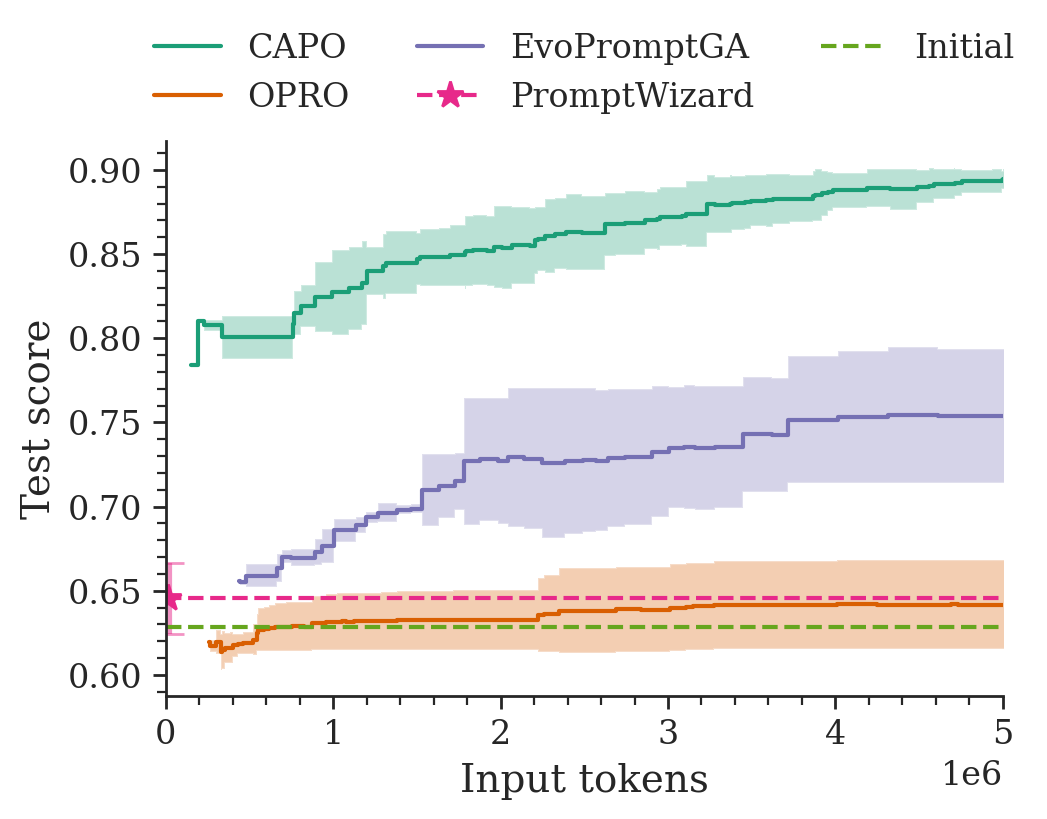

In [43]:
plot_population_scores_comparison(
    "subj",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

--> use in main paper on first side because it is beautiful 💕

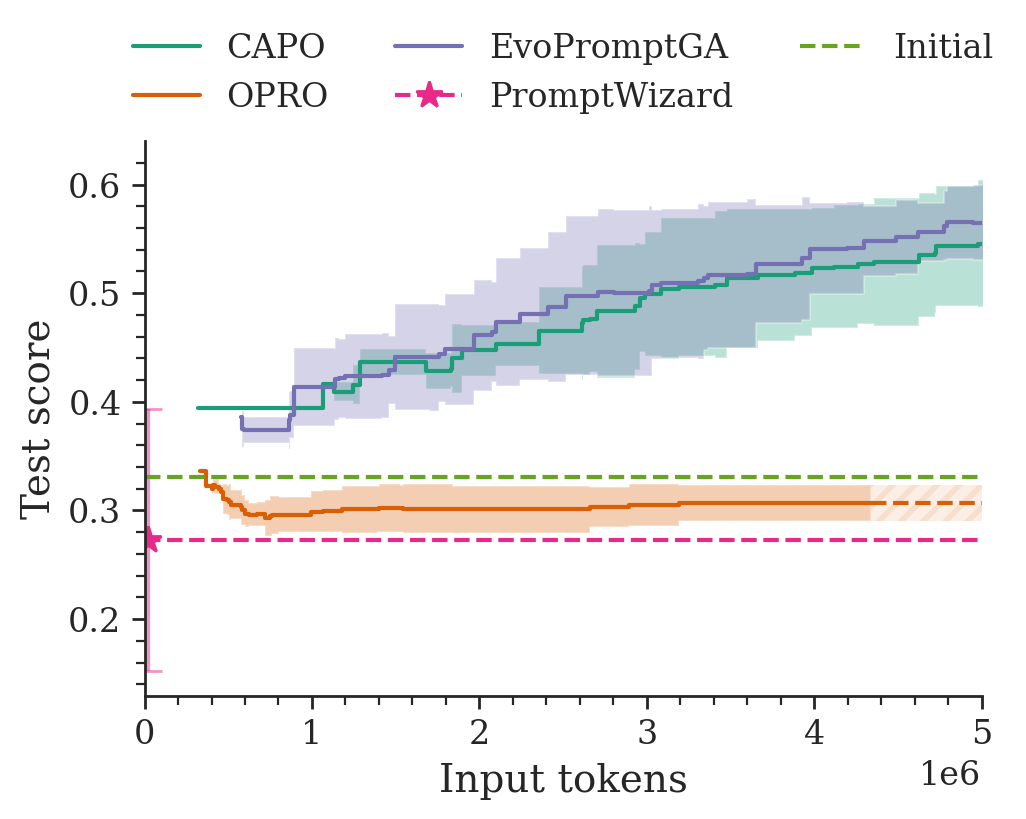

In [44]:
plot_population_scores_comparison(
    "gsm8k",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

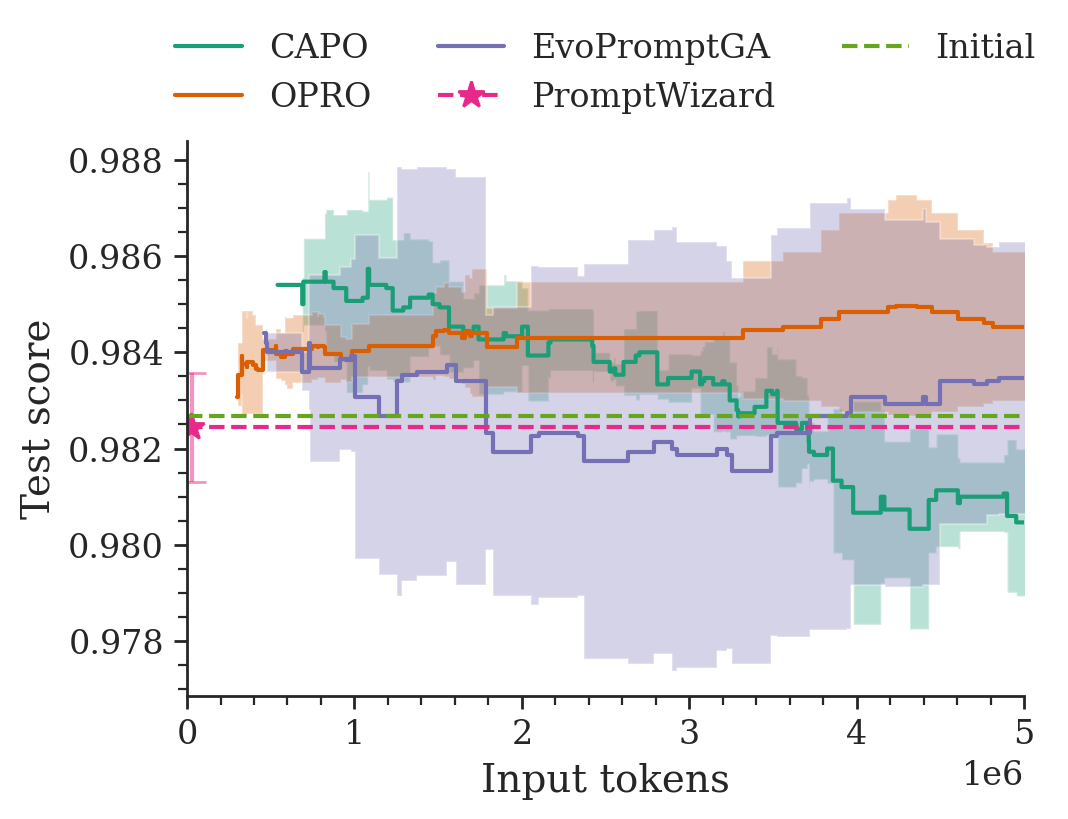

In [45]:
plot_population_scores_comparison(
    "copa",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

## Llama

In [46]:
generate_comparison_table(model="llama", path_prefix="../../")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47Â±1.53,87.06Â±0.65,62.00Â±5.22,44.28Â±4.91,97.65Â±1.31,69.89
OPRO,60.87Â±1.09,88.20Â±0.49,71.33Â±2.80,51.87Â±2.04,98.07Â±0.57,74.07
PromptWizard,32.80Â±1.73,23.33Â±0.19,51.93Â±0.25,39.33Â±15.09,50.33Â±0.34,39.55
EvoPromptGA,60.53Â±1.37,88.67Â±0.41,75.53Â±1.39,50.87Â±0.74,97.60Â±1.13,74.64
CAPO,62.27Â±0.34,88.80Â±0.75,91.60Â±2.16,73.73Â±3.73,98.27Â±0.52,82.93


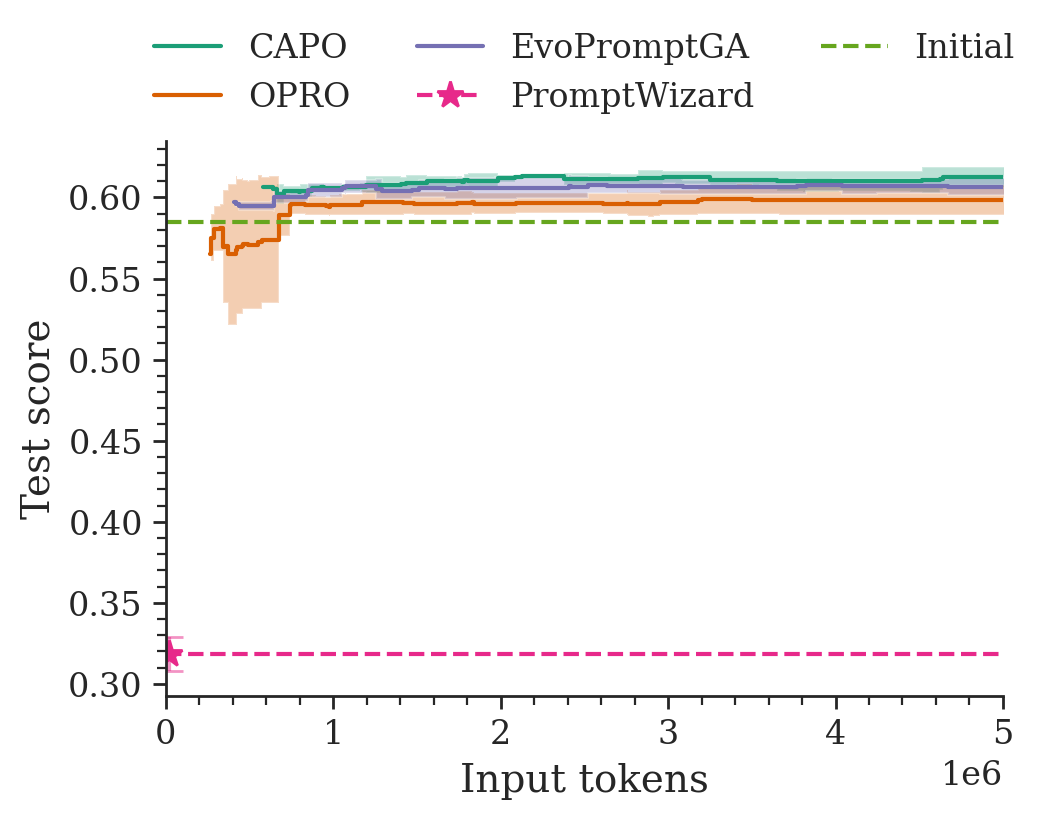

In [47]:
plot_population_scores_comparison(
    "sst-5",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

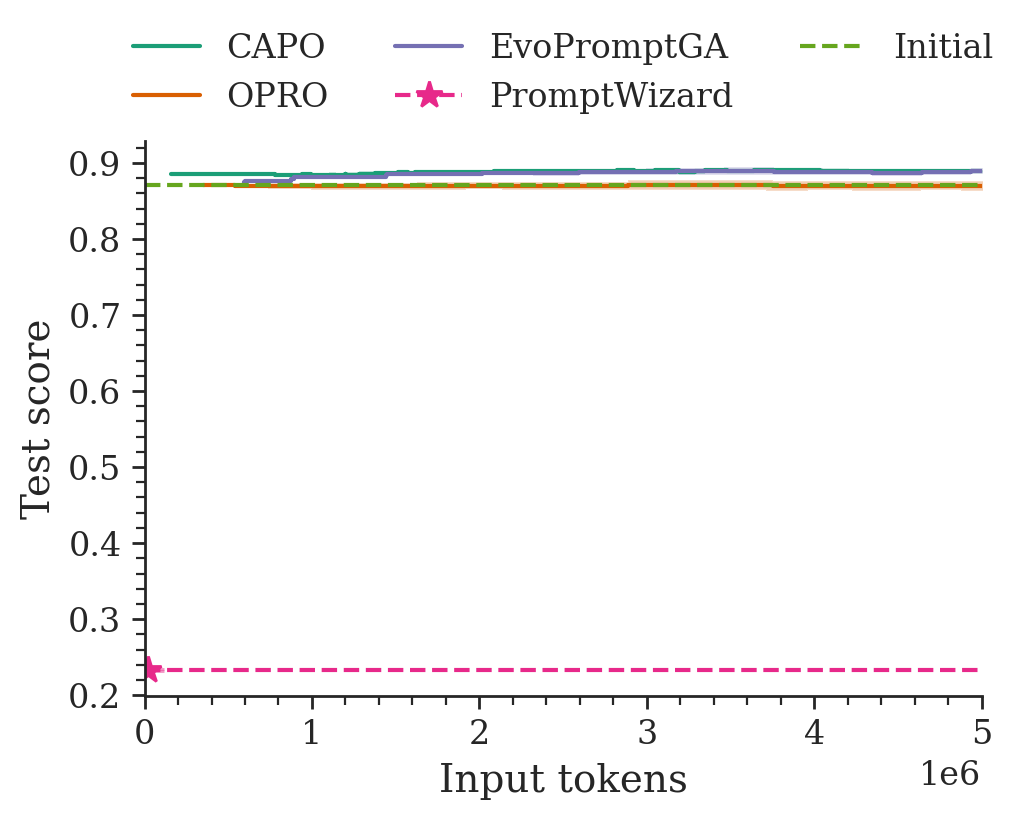

In [48]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

PromptWizard performs really bad for Llama

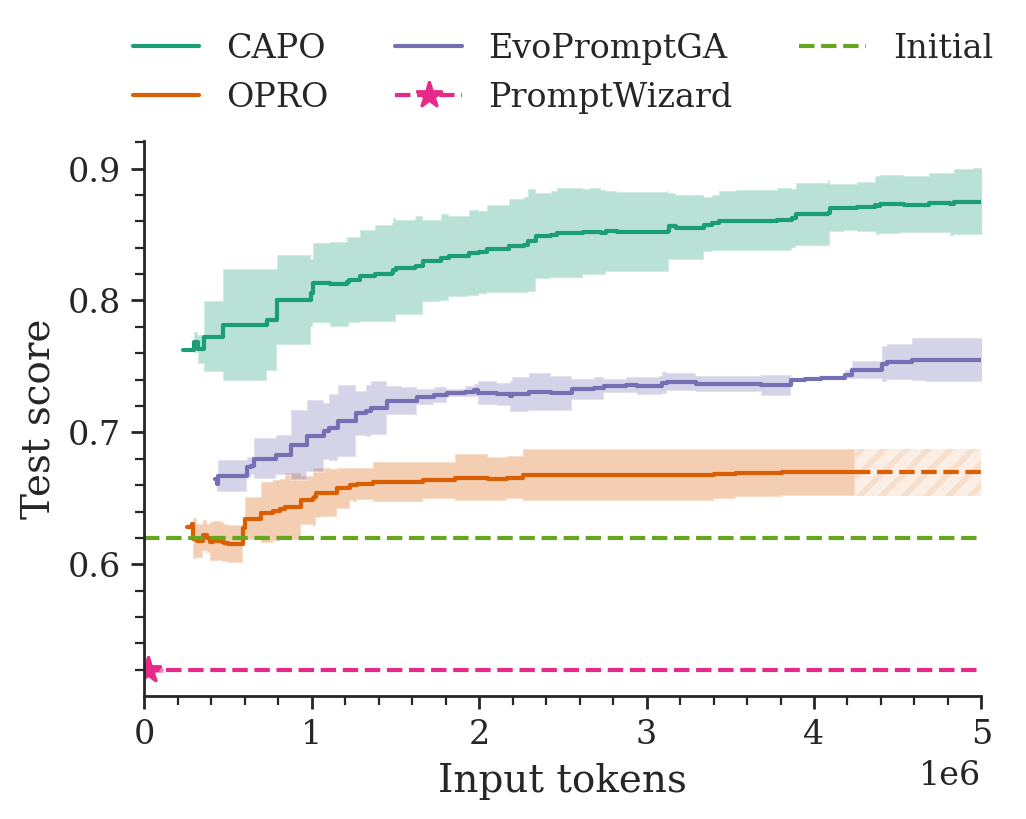

In [49]:
plot_population_scores_comparison(
    "subj",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

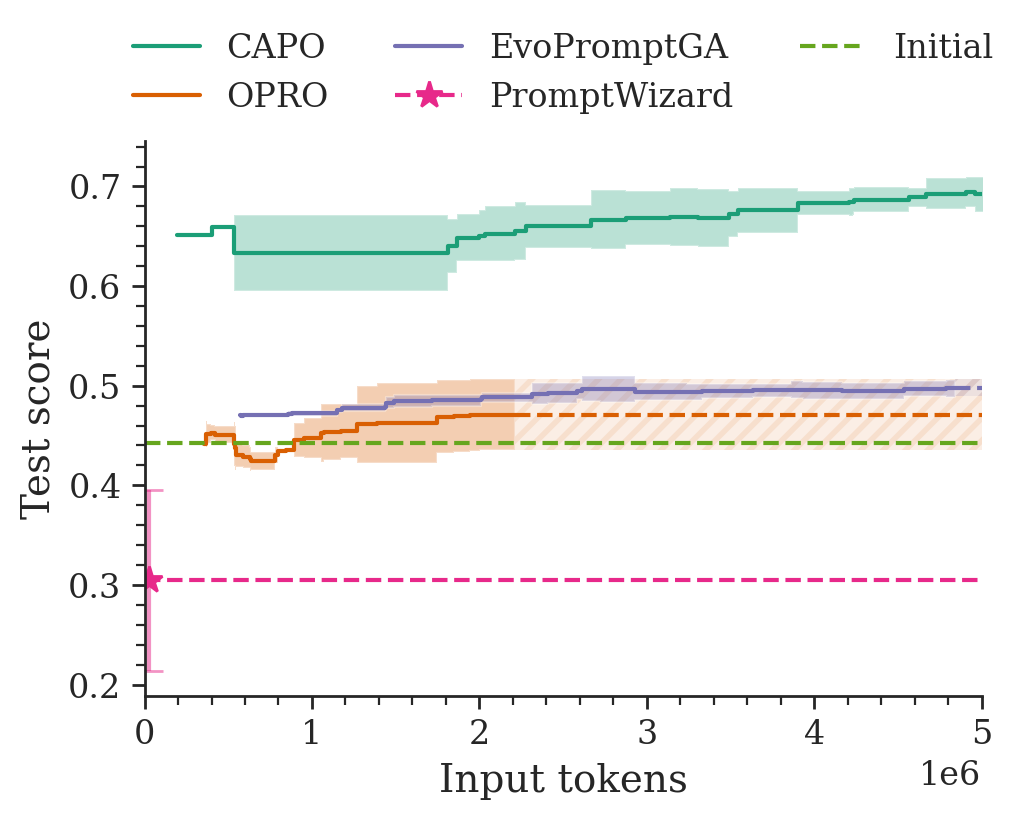

In [50]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    OPTIMS,
    agg="mean",
    # plot_seeds=True,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
    n_seeds_to_plot_std=1,
);

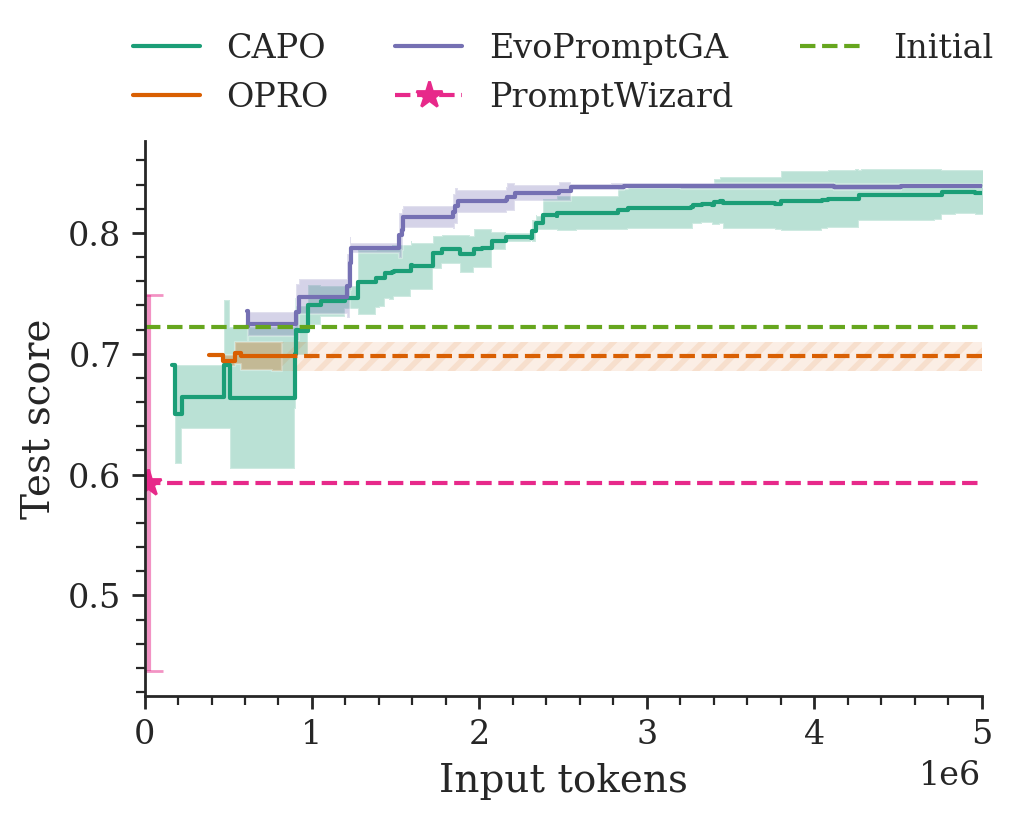

In [59]:
plot_population_scores_comparison(
    "agnews",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

Candidates for main paper
- GSM8K (because its most relevant dataset)
- Subj using qwen (because it has beautiful curves)

Takeaways:
- PromptWizard's performance is highly dependend on model used (=> strict templates!)

# Table Results

In [52]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model, cutoff_tokens=1_000_000, path_prefix="../.."))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47Â±1.53,87.06Â±0.65,62.00Â±5.22,44.28Â±4.91,97.65Â±1.31,69.89
OPRO,59.33Â±1.23,88.20Â±0.49,71.33Â±2.80,51.73Â±1.88,98.07Â±0.57,73.73
PromptWizard,32.80Â±1.73,23.33Â±0.19,51.93Â±0.25,39.33Â±15.09,50.33Â±0.34,39.55
EvoPromptGA,60.47Â±1.33,88.73Â±0.41,74.27Â±2.51,50.20Â±0.71,98.53Â±0.19,74.44
CAPO,61.67Â±0.82,89.20Â±0.59,90.00Â±0.28,76.50Â±2.50,98.27Â±0.52,83.13


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68Â±1.94,79.57Â±0.84,62.85Â±4.53,33.08Â±7.78,98.27Â±0.43,66.09
OPRO,57.40Â±0.16,80.00Â±0.00,69.40Â±0.57,46.33Â±3.07,98.53Â±0.19,70.33
PromptWizard,39.73Â±12.31,63.47Â±28.49,64.93Â±5.01,15.27Â±20.19,98.13Â±0.19,56.31
EvoPromptGA,57.07Â±0.66,80.27Â±0.74,71.93Â±1.57,54.33Â±11.27,98.33Â±0.57,72.39
CAPO,59.87Â±0.93,87.27Â±0.84,87.13Â±1.80,54.40Â±0.00,98.67Â±0.25,77.47


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69Â±2.94,72.21Â±7.45,61.65Â±6.04,33.71Â±5.89,94.56Â±0.94,62.17
OPRO,53.20Â±2.83,84.20Â±0.16,77.07Â±0.09,43.53Â±0.47,96.33Â±0.34,70.87
PromptWizard,31.07Â±3.80,44.40Â±25.76,59.00Â±5.09,48.67Â±6.46,57.47Â±10.28,48.12
EvoPromptGA,54.20Â±1.98,83.87Â±1.25,77.80Â±0.00,41.13Â±2.92,96.33Â±0.62,70.67
CAPO,56.73Â±1.18,84.13Â±1.59,77.00Â±2.00,nanÂ±nan,95.40Â±1.07,78.32


In [53]:
for model in MODELS:
    print(f"Model: {model}")
    display(generate_comparison_table(model=model, cutoff_tokens=3_000_000, path_prefix="../../"))

Model: llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47Â±1.53,87.06Â±0.65,62.00Â±5.22,44.28Â±4.91,97.65Â±1.31,69.89
OPRO,61.73Â±1.09,88.20Â±0.49,71.33Â±2.80,51.87Â±2.04,98.07Â±0.57,74.24
PromptWizard,32.80Â±1.73,23.33Â±0.19,51.93Â±0.25,39.33Â±15.09,50.33Â±0.34,39.55
EvoPromptGA,60.53Â±1.37,88.93Â±0.52,74.93Â±1.09,51.27Â±0.96,97.40Â±1.02,74.61
CAPO,62.33Â±0.38,89.47Â±0.34,88.13Â±1.93,74.80Â±3.15,98.27Â±0.52,82.60


Model: qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68Â±1.94,79.57Â±0.84,62.85Â±4.53,33.08Â±7.78,98.27Â±0.43,66.09
OPRO,57.40Â±0.16,79.87Â±0.19,70.67Â±2.36,46.33Â±3.07,98.47Â±0.25,70.55
PromptWizard,39.73Â±12.31,63.47Â±28.49,64.93Â±5.01,15.27Â±20.19,98.13Â±0.19,56.31
EvoPromptGA,58.07Â±2.38,81.67Â±0.96,75.20Â±3.22,59.13Â±11.37,97.87Â±0.66,74.39
CAPO,59.93Â±0.74,87.00Â±0.59,89.93Â±1.47,58.53Â±2.96,98.20Â±0.28,78.72


Model: mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69Â±2.94,72.21Â±7.45,61.65Â±6.04,33.71Â±5.89,94.56Â±0.94,62.17
OPRO,53.20Â±2.83,84.20Â±0.16,77.07Â±0.09,43.53Â±0.47,96.33Â±0.34,70.87
PromptWizard,31.07Â±3.80,44.40Â±25.76,59.00Â±5.09,48.67Â±6.46,57.47Â±10.28,48.12
EvoPromptGA,54.60Â±0.82,84.40Â±0.28,73.73Â±3.27,43.00Â±2.87,96.13Â±0.34,70.37
CAPO,60.20Â±0.33,84.00Â±1.77,80.07Â±1.00,63.20Â±3.83,95.13Â±1.20,76.52


In [70]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model, path_prefix="../.."))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47Â±1.53,87.06Â±0.65,62.00Â±5.22,44.28Â±4.91,97.65Â±1.31,69.89
OPRO,60.87Â±1.09,88.20Â±0.49,71.33Â±2.80,51.87Â±2.04,98.07Â±0.57,74.07
PromptWizard,32.80Â±1.73,23.33Â±0.19,51.93Â±0.25,39.33Â±15.09,50.33Â±0.34,39.55
EvoPromptGA,60.53Â±1.37,88.67Â±0.41,75.53Â±1.39,50.87Â±0.74,97.60Â±1.13,74.64
CAPO,62.27Â±0.34,88.80Â±0.75,91.60Â±2.16,73.73Â±3.73,98.27Â±0.52,82.93


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68Â±1.94,79.57Â±0.84,62.85Â±4.53,33.08Â±7.78,98.27Â±0.43,66.09
OPRO,57.00Â±0.43,79.87Â±0.19,70.67Â±2.36,46.33Â±3.07,98.67Â±0.34,70.51
PromptWizard,39.73Â±12.31,63.47Â±28.49,64.93Â±5.01,15.27Â±20.19,98.13Â±0.19,56.31
EvoPromptGA,58.60Â±1.73,81.73Â±1.68,75.87Â±3.58,61.27Â±8.39,97.87Â±0.66,75.07
CAPO,59.07Â±0.50,87.07Â±0.81,91.00Â±0.65,60.20Â±4.82,98.47Â±0.19,79.16


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69Â±2.94,72.21Â±7.45,61.65Â±6.04,33.71Â±5.89,94.56Â±0.94,62.17
OPRO,53.20Â±2.83,84.20Â±0.16,77.07Â±0.09,43.53Â±0.47,96.33Â±0.34,70.87
PromptWizard,31.07Â±3.80,44.40Â±25.76,59.00Â±5.09,48.67Â±6.46,57.47Â±10.28,48.12
EvoPromptGA,54.93Â±0.94,84.40Â±0.28,74.93Â±2.04,43.93Â±3.85,96.13Â±0.34,70.87
CAPO,60.20Â±0.33,84.33Â±2.13,81.67Â±1.64,65.07Â±1.20,95.13Â±1.20,77.28


If we cutoff very early (already at 1_000_000 we outperform the other optimizers in nearly all cases)

## Prompt Length Analysis

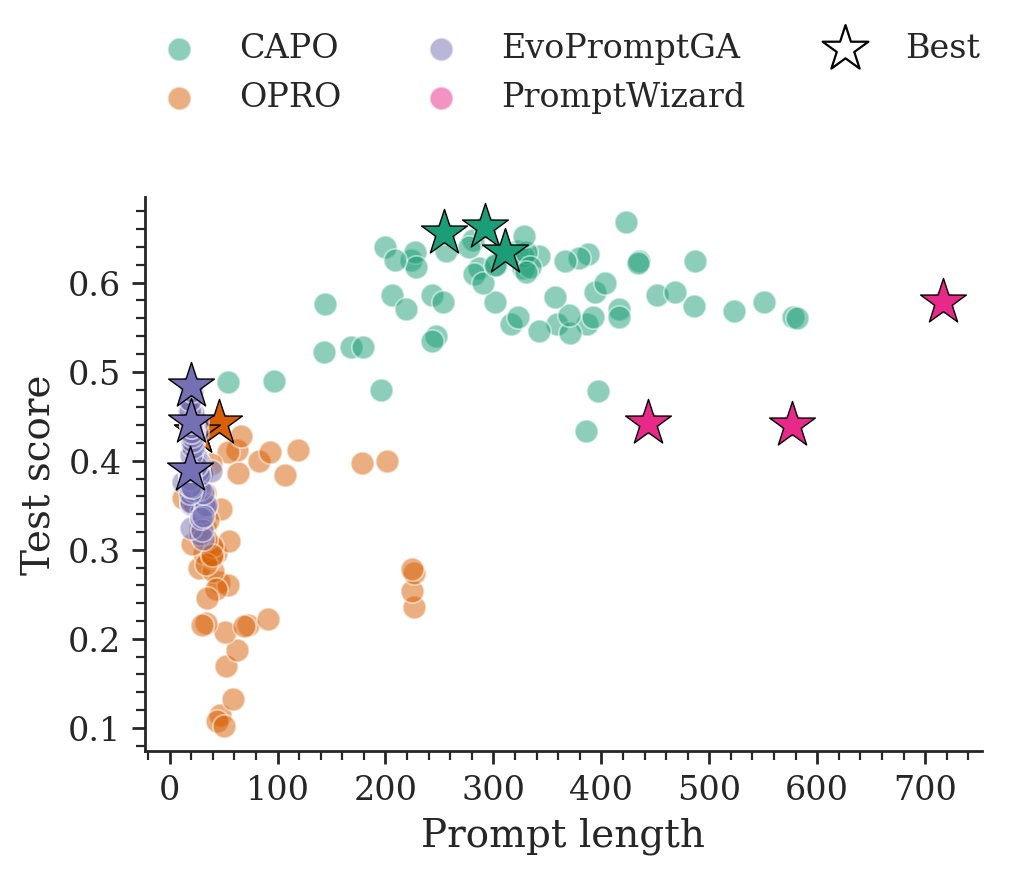

In [66]:
plot_length_score(
    "gsm8k",
    "mistral",
    ["CAPO", "OPRO", "EvoPromptGA", "PromptWizard"],
    x_col="prompt_len",
    score_col="test_score",
    log_scale=False,
    path_prefix="../..",
);

=> maybe we are cost aware in the sense that we are evaluating the entire "front" (EvoPrompt and Opro are very short and Promptwizard very long)

- promptwizard has extremly long prompts, that only sometimes can compete with competitors

=> interesting for plotting: 
- subj using qwen or gsm8k using mistral => shows that we have a huge range

## Prompt Length Tables

In [56]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model, score_col="prompt_len", path_prefix="../.."))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,33.20Â±4.50,34.62Â±5.70,30.67Â±8.44,29.07Â±6.89,30.27Â±5.20,31.56
OPRO,63.00Â±21.77,31.67Â±3.77,42.33Â±3.86,58.00Â±14.70,33.33Â±7.41,45.67
PromptWizard,562.67Â±35.52,1106.33Â±264.57,863.00Â±399.56,543.67Â±172.82,612.67Â±33.21,737.67
EvoPromptGA,32.67Â±2.49,30.00Â±0.82,25.00Â±5.72,27.67Â±2.05,32.00Â±2.45,29.47
CAPO,161.00Â±84.50,110.33Â±45.57,157.67Â±12.26,480.67Â±112.90,83.00Â±21.60,198.53


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,33.20Â±4.50,34.62Â±5.70,30.67Â±8.44,29.07Â±6.89,30.27Â±5.20,31.56
OPRO,37.67Â±5.44,37.00Â±8.49,32.67Â±4.71,26.67Â±2.36,51.33Â±14.06,37.07
PromptWizard,677.33Â±517.10,753.33Â±541.43,296.67Â±22.29,698.00Â±391.85,337.00Â±31.89,552.47
EvoPromptGA,37.00Â±3.74,34.67Â±5.79,35.33Â±5.44,24.67Â±6.02,40.00Â±9.42,34.33
CAPO,187.33Â±27.79,116.00Â±56.17,158.00Â±13.49,229.67Â±89.13,104.67Â±49.24,159.13


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,33.20Â±4.50,34.62Â±5.70,30.67Â±8.44,29.07Â±6.89,30.27Â±5.20,31.56
OPRO,29.33Â±1.89,44.00Â±7.07,26.00Â±0.00,32.00Â±9.90,35.67Â±5.19,33.40
PromptWizard,1027.33Â±246.24,544.00Â±214.37,701.00Â±297.09,579.00Â±111.87,1139.00Â±188.34,798.07
EvoPromptGA,29.33Â±1.89,39.00Â±7.48,25.67Â±0.47,19.67Â±0.47,31.00Â±1.63,28.93
CAPO,142.00Â±20.46,153.33Â±77.60,138.33Â±38.87,285.67Â±23.70,76.33Â±26.64,159.13


# Prompt Survival Analysis

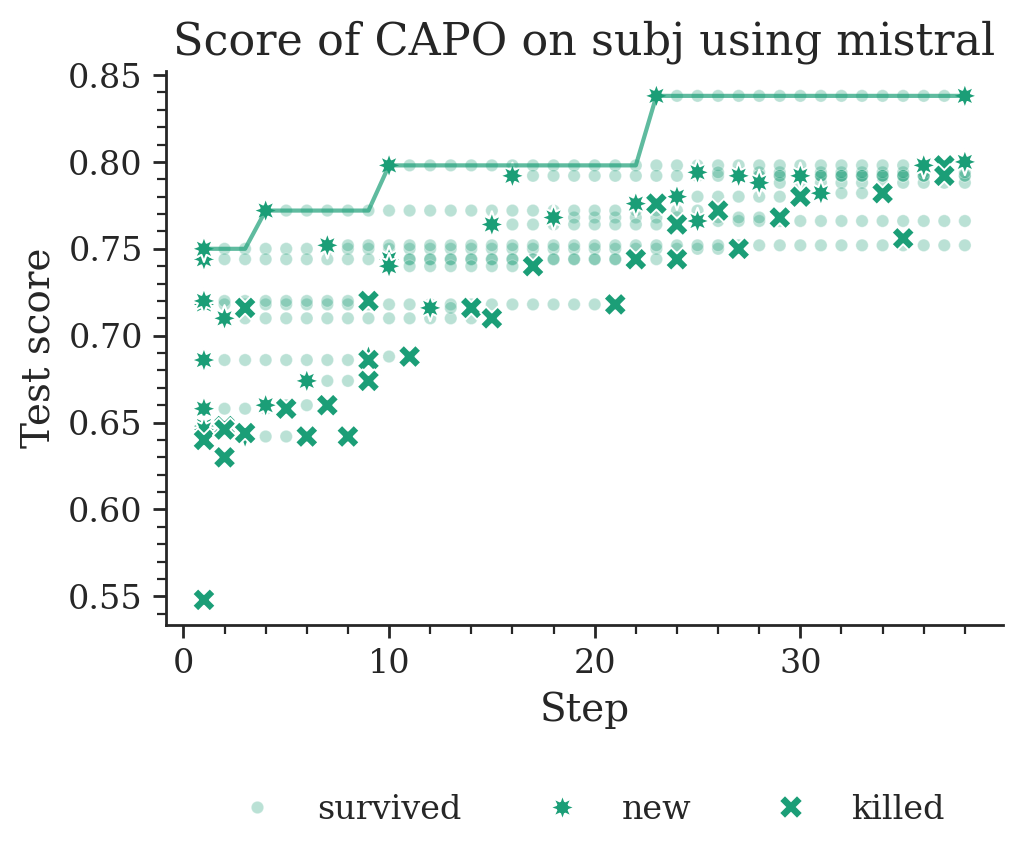

In [57]:
plot_population_members(
    "subj", "mistral", "CAPO", x_col="step", score_col="test_score", path_prefix="../..", seeds=[42]
);

## Performance & Examples

In [58]:
from pprint import pprint as pp

In [69]:
# print best prompt per dataset, model, optimizer
for dataset in ["agnews"]:
    for model in ["llama"]:
        for optim in ["promptwizard"]:
            print(f"Dataset: {dataset}, Model: {model}, Optimizer: {optim}")
            df = get_results(
                dataset=dataset,
                model=model,
                optim=optim,
                # sort_by="test_score",
                # ascending=False,
                path_prefix="../../",
            )

            if df.empty:
                continue
            p, s = df.nlargest(1, "test_score")[["prompt", "test_score"]].values[0]
            print(s)
            print("'''")
            pp(p)
            print("'''")

Dataset: agnews, Model: llama, Optimizer: promptwizard
0.236
'''
(' What are the key assumptions underlying this news article classification '
 "task? To simplify the problem, let's start by identifying the categories: "
 'World, Sports, Business, and Sci/Tech. How can we make progress on this '
 'problem? By reading the news article and trying to classify it into one of '
 "the four categories, we can start making progress. Let's make a list of "
 'ideas for solving this problem and apply them one by one to see if any '
 'progress can be made. Place your classification within <final_answer> '
 'tags. \r\n'
 '\r\n'
 '\r\n'
 '[Question] Facebook Acquires Virtual Reality Startup for $2 Billion (The New '
 'York Times) - Facebook has acquired a virtual reality startup, Oculus VR, '
 'for $2 billion, in a move to expand its presence in the technology '
 'industry.\r\n'
 '[Answer] To classify the given news article into one of the four categories '
 '(World, Sports, Business, and Sci/Tech),

capo can be very repetitive? (SST-5 mistral) potentially the crossover meta prompt has been misinterpreted (merge the two prompts) => however it is performing superior!

subj for qwen and llama with capo has a crazy outlier to the top
